In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from google.colab import files
from keras_preprocessing import image
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [ ]:
print("TensorFlow Version :", tf.__version__)

TensorFlow Version : 2.5.0


In [ ]:
# print("Farrel")
# farrel_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/1-farrel/traditional/'
# farrel_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/1-farrel/modern/'
# print('Traditional Batik:', len(os.listdir(farrel_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(farrel_modern_source_dir)))

# print("\nDosen")
# dosen_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/2-dosen/traditional/'
# dosen_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/2-dosen/modern/'
# print('Traditional Batik:', len(os.listdir(dosen_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(dosen_modern_source_dir)))

# print("\nAnggun")
# anggun_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/3-anggun/traditional/'
# anggun_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/3-anggun/modern/'
# print('Traditional Batik:', len(os.listdir(anggun_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(anggun_modern_source_dir)))

# print("\nRiqqah")
# riqqah_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/4-riqqah/traditional/'
# riqqah_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/4-riqqah/modern/'
# print('Traditional Batik:', len(os.listdir(riqqah_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(riqqah_modern_source_dir)))

In [ ]:
# def copy_data(SOURCE, DESTINATION):
#   file_names = os.listdir(SOURCE)

#   for index, file in enumerate(file_names):
#     copyfile(os.path.join(SOURCE, file), os.path.join(DESTINATION, file))

# gdrive_traditional_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all-v2/traditional/'
# gdrive_modern_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all-v2/modern/'

# copy_data(farrel_traditional_source_dir, gdrive_traditional_dir)
# copy_data(farrel_modern_source_dir, gdrive_modern_dir)

# copy_data(dosen_traditional_source_dir, gdrive_traditional_dir)
# copy_data(dosen_modern_source_dir, gdrive_modern_dir)

# copy_data(riqqah_traditional_source_dir, gdrive_traditional_dir)
# copy_data(riqqah_modern_source_dir, gdrive_modern_dir)

In [ ]:
# print("All")
# # 10
# # 3
# all_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all/traditional/'
# all_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all/modern/'
# print('Traditional Batik:', len(os.listdir(all_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(all_modern_source_dir)))

# print("All except 2")
# # 11
# # 4
# all_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_2/traditional/'
# all_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_2/modern/'
# print('Traditional Batik:', len(os.listdir(all_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(all_modern_source_dir)))

# print("All except 3")
# # 10
# # 3
# all_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_3/traditional/'
# all_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_3/modern/'
# print('Traditional Batik:', len(os.listdir(all_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(all_modern_source_dir)))
# # # print(os.listdir(all_modern_source_dir))

In [ ]:
print("Dataset")
all_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Machine Learning/Dataset/Main Dataset/Batik Technique Dataset/traditional/'
all_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Machine Learning/Dataset/Main Dataset/Batik Technique Dataset/modern/'
print('Total:', len(os.listdir(all_traditional_source_dir)) + len(os.listdir(all_modern_source_dir)))
print('Batik Tulis:', len(os.listdir(all_traditional_source_dir)))
print('Batik Cetak:', len(os.listdir(all_modern_source_dir)))

Dataset
Total: 566
Batik Tulis: 310
Batik Cetak: 256


In [ ]:
try:
    os.mkdir('/tmp/batik-technique')
    os.mkdir(os.path.join('/tmp/batik-technique/', 'training'))
    os.mkdir(os.path.join('/tmp/batik-technique/', 'validation'))
    os.mkdir(os.path.join('/tmp/batik-technique/', 'testing'))
    os.mkdir(os.path.join('/tmp/batik-technique/training/', 'traditional'))
    os.mkdir(os.path.join('/tmp/batik-technique/training/', 'modern'))
    os.mkdir(os.path.join('/tmp/batik-technique/validation/', 'traditional'))
    os.mkdir(os.path.join('/tmp/batik-technique/validation/', 'modern'))
    os.mkdir(os.path.join('/tmp/batik-technique/testing/', 'traditional'))
    os.mkdir(os.path.join('/tmp/batik-technique/testing/', 'modern'))
except OSError:
    pass

In [ ]:
# training_dir = '/tmp/batik-technique/training/'
# training_traditional_dir = '/tmp/batik-technique/training/traditional/'
# training_modern_dir = '/tmp/batik-technique/training/modern/'

# validation_dir = '/tmp/batik-technique/validation/'
# validation_traditional_dir = '/tmp/batik-technique/validation/traditional/'
# validation_modern_dir = '/tmp/batik-technique/validation/modern/'

# testing_dir = '/tmp/batik-technique/testing/'
# testing_traditional_dir = '/tmp/batik-technique/testing/traditional/'
# testing_modern_dir = '/tmp/batik-technique/testing/modern/'


training_dir = "/content/gdrive/Shared drives/Capstone Project/Machine Learning/Dataset/Main Dataset/Batik Technique Dataset Splited/Train/"
training_traditional_dir = "/content/gdrive/Shared drives/Capstone Project/Machine Learning/Dataset/Main Dataset/Batik Technique Dataset Splited/Train/Batik Tulis/"
training_modern_dir = "/content/gdrive/Shared drives/Capstone Project/Machine Learning/Dataset/Main Dataset/Batik Technique Dataset Splited/Train/Batik Cetak/"

validation_dir = "/content/gdrive/Shared drives/Capstone Project/Machine Learning/Dataset/Main Dataset/Batik Technique Dataset Splited/Validation/"
validation_traditional_dir = "/content/gdrive/Shared drives/Capstone Project/Machine Learning/Dataset/Main Dataset/Batik Technique Dataset Splited/Validation/Batik Tulis/"
validation_modern_dir = "/content/gdrive/Shared drives/Capstone Project/Machine Learning/Dataset/Main Dataset/Batik Technique Dataset Splited/Validation/Batik Cetak/"

testing_dir = "/content/gdrive/Shared drives/Capstone Project/Machine Learning/Dataset/Main Dataset/Batik Technique Dataset Splited/Test/"
testing_traditional_dir = "/content/gdrive/Shared drives/Capstone Project/Machine Learning/Dataset/Main Dataset/Batik Technique Dataset Splited/Test/Batik Tulis/"
testing_modern_dir = "/content/gdrive/Shared drives/Capstone Project/Machine Learning/Dataset/Main Dataset/Batik Technique Dataset Splited/Test/Batik Cetak/"

In [ ]:
# def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE):
#   if not os.path.exists(TRAINING): 
#     os.makedirs(TRAINING) 

#   if not os.path.exists(VALIDATION): 
#     os.makedirs(VALIDATION)

#   if not os.path.exists(TESTING): 
#     os.makedirs(TESTING) 

#   file_names = os.listdir(SOURCE)

#   random_set = random.sample(file_names, len(file_names))
#   random_set_length = len(random_set)

#   for index, data in enumerate(random_set):
#     if index < SPLIT_SIZE * random_set_length:
#       if index < 0.8 * random_set_length:
#         copyfile(os.path.join(SOURCE, data), os.path.join(TRAINING, data))
#       else:
#         copyfile(os.path.join(SOURCE, data), os.path.join(VALIDATION, data))
#     else: 
#       copyfile(os.path.join(SOURCE, data), os.path.join(TESTING, data))

In [ ]:
# split_size = .9
# split_data(all_traditional_source_dir, training_traditional_dir, validation_traditional_dir, testing_traditional_dir, split_size)
# split_data(all_modern_source_dir, training_modern_dir, validation_modern_dir, testing_modern_dir, split_size)

In [ ]:
print("Training Data")
print("Train Set:", len(os.listdir(training_traditional_dir)) + len(os.listdir(training_modern_dir)))
print("Batik Tulis:", len(os.listdir(training_traditional_dir)))
print("Batik Cetak :", len(os.listdir(training_modern_dir)))

print("\nValidation Data")
print("Validation Set:", len(os.listdir(validation_traditional_dir)) + len(os.listdir(validation_modern_dir)))
print("Batik Tulis :", len(os.listdir(validation_traditional_dir)))
print("Batik Cetak :", len(os.listdir(validation_modern_dir)))

print("\nTesting Data")
print("Test Set:", len(os.listdir(testing_traditional_dir)) + len(os.listdir(testing_modern_dir)))
print("Batik Tulis :", len(os.listdir(testing_traditional_dir)))
print("Batik Cetak :", len(os.listdir(testing_modern_dir)))

Training Data
Train Set: 453
Batik Tulis: 248
Batik Cetak : 205

Validation Data
Validation Set: 57
Batik Tulis : 31
Batik Cetak : 26

Testing Data
Test Set: 56
Batik Tulis : 31
Batik Cetak : 25


In [ ]:
train_batiktulis_names = os.listdir(training_traditional_dir)
print(train_batiktulis_names[:10])

train_batikcetak_names = os.listdir(training_modern_dir)
print(train_batikcetak_names[:10])

['IMG_20210509_085743.jpg', 'DSCF0513.JPG', 'DSCF0792.JPG', 'IMG20210531133809.jpg', 'IMG_20210509_090952.jpg', '060K04.jpg', 'IMG20210531133535.jpg', 'IMG20210531133801.jpg', 'IMG20210531133328.jpg', 'DSCF0916.JPG']
['DSCF0829.JPG', 'IMG20210531083255.jpg', 'IMG20210531090022.jpg', 'IMG20210531091428.jpg', 'DSCF0831.JPG', '(print)-sidomukti-1.jpg', 'IMG20210531083358.jpg', 'DSCF0840.JPG', 'IMG20210531091610.jpg', 'DSCF0839.JPG']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

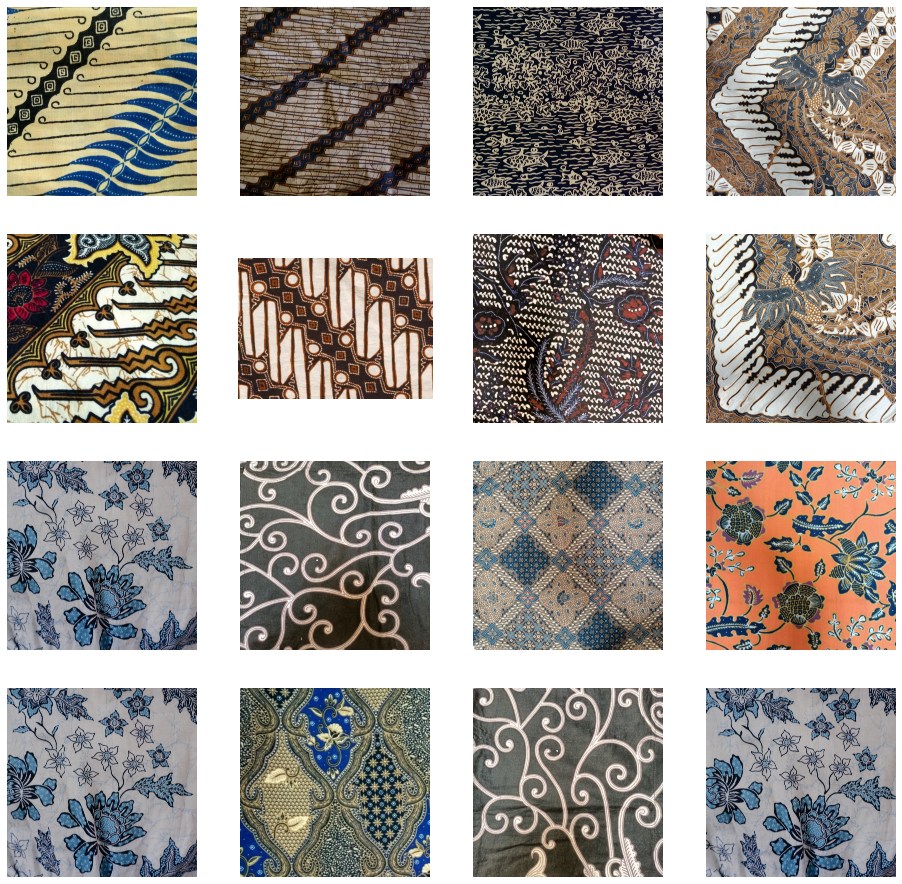

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_tulis_pix = [os.path.join(training_traditional_dir, fname) 
                for fname in train_batiktulis_names[pic_index-8:pic_index]]
next_cetak_pix = [os.path.join(training_modern_dir, fname) 
                for fname in train_batikcetak_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_tulis_pix+next_cetak_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
# gdrive_train_traditional_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/Main Dataset/Batik Technique Dataset Splited/Train/Batik Tulis/"
# gdrive_train_modern_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/Main Dataset/Batik Technique Dataset Splited/Train/Batik Cetak/"

# gdrive_validation_traditional_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/Main Dataset/Batik Technique Dataset Splited/Validation/Batik Tulis/"
# gdrive_validation_modern_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/Main Dataset/Batik Technique Dataset Splited/Validation/Batik Cetak/"

# gdrive_test_traditional_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/Main Dataset/Batik Technique Dataset Splited/Test/Batik Tulis/"
# gdrive_test_modern_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/Main Dataset/Batik Technique Dataset Splited/Test/Batik Cetak/"

In [ ]:
# def copy_data(SOURCE, DESTINATION):
#   file_names = os.listdir(SOURCE)

#   for index, file in enumerate(file_names):
#     copyfile(os.path.join(SOURCE, file), os.path.join(DESTINATION, file))

# # print(os.listdir(modern_test_data_source_path))

In [ ]:
# copy_data(training_traditional_dir, gdrive_train_traditional_path)
# copy_data(training_modern_dir, gdrive_train_modern_path)

# copy_data(validation_traditional_dir, gdrive_validation_traditional_path)
# copy_data(validation_modern_dir, gdrive_validation_modern_path)

# copy_data(testing_traditional_dir, gdrive_test_traditional_path)
# copy_data(testing_modern_dir, gdrive_test_modern_path)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    batch_size=11,
    class_mode = 'categorical',
    target_size = (300, 300),
    shuffle=True
)



validation_datagen = ImageDataGenerator(
    rescale = 1/255
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=4,
    class_mode = 'categorical',
    target_size = (300, 300),
    shuffle=True
)



test_datagen = ImageDataGenerator(
    rescale = 1/255
)

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    batch_size=4,
    class_mode = 'categorical',
    target_size = (300, 300),
    shuffle=True
)

Found 453 images belonging to 2 classes.
Found 57 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(300, 300, 3),
    include_top=False
  )

base_model.trainable = False
# for layer in base_model.layers:
#   layer.trainable = False

base_model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 150, 150, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 150, 150, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 150, 150, 32) 0           bn_Conv1[0][0]                   
________________

In [ ]:
inputs = tf.keras.Input(shape=(300, 300, 3))

x = base_model(inputs, training=False)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(2, activation='softmax')(x)

In [ ]:
model = Model(inputs, outputs)

model.summary()

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 10, 10, 1280)      2257984   
_________________________________________________________________
flatten (Flatten)            (None, 128000)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              131073024 
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2050      
Total params: 133,333,058
Trainable params: 131,075,074
Non-trainable params: 2,257,984
_______________________________________

In [ ]:
history = model.fit(train_generator,
                    epochs=25,
                    validation_data=validation_generator,
                    verbose = 1)

Epoch 1/25
42/42 [==============================] - 526s 12s/step - loss: 5.1238 - acc: 0.6446 - val_loss: 0.6570 - val_acc: 0.8070
Epoch 2/25
42/42 [==============================] - 98s 2s/step - loss: 1.0187 - acc: 0.7660 - val_loss: 0.6628 - val_acc: 0.8246
Epoch 3/25
42/42 [==============================] - 92s 2s/step - loss: 0.8642 - acc: 0.8190 - val_loss: 0.4909 - val_acc: 0.8596
Epoch 4/25
42/42 [==============================] - 94s 2s/step - loss: 0.5907 - acc: 0.8565 - val_loss: 1.5452 - val_acc: 0.6140
Epoch 5/25
42/42 [==============================] - 94s 2s/step - loss: 0.5513 - acc: 0.8742 - val_loss: 0.7746 - val_acc: 0.8421
Epoch 6/25
42/42 [==============================] - 92s 2s/step - loss: 0.6319 - acc: 0.8543 - val_loss: 0.3631 - val_acc: 0.9123
Epoch 7/25
42/42 [==============================] - 93s 2s/step - loss: 0.5735 - acc: 0.8720 - val_loss: 0.4281 - val_acc: 0.8421
Epoch 8/25
42/42 [==============================] - 93s 2s/step - loss: 0.2271 - acc: 0.

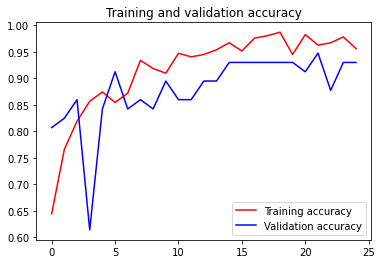

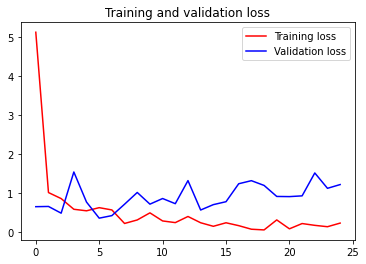

In [ ]:
#----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot  ( epochs, val_acc, 'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
# plt.title('Training accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot  ( epochs, val_loss, 'b', label='Validation loss')
plt.title ('Training and validation loss')
# plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
labels = train_generator.class_indices.keys()
print(labels)

count_modern = 0
count_traditional = 0
def test_model(source_path, test_set):
  test_set_length = len(test_set)
  count_modern = 0
  count_traditional = 0
  for file_name in test_set:
    img_path = source_path + file_name
    # print(img_path)
    img = image.load_img(img_path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    gdrive_saved_model_path = "/content/gdrive/Shared drives/Capstone Project/Machine Learning/batik_authenticity_classification.h5"
    model = tf.keras.models.load_model(gdrive_saved_model_path)
    result = model.predict(images)[0]
    # print(result[0])
    if result[0] * 100 > 50:
      count_modern += 1
    else:
      count_traditional += 1

    # plt.imshow(img)
    # plt.show()
    
    print("")
    print(file_name)
    for (label, percentage) in zip(labels, result):
      print("{}: {:.2f}%".format(label, percentage*100))

  print("\nJumlah Test Data :", test_set_length)
  print("Terklasifikasi Batik Cetak :", count_modern)
  print("Terklasifikasi Batik Tulis :", count_traditional)


modern_batik_set = os.listdir(testing_modern_dir)
traditional_batik_set = os.listdir(testing_traditional_dir)

# test_model(testing_modern_dir, modern_batik_set)
# test_model(testing_traditional_dir, traditional_batik_set)

dict_keys(['Batik Cetak', 'Batik Tulis'])


In [ ]:
# Test Batik Cetak
test_model(testing_modern_dir, modern_batik_set)


IMG20210531085201.jpg
Batik Cetak: 99.93%
Batik Tulis: 0.07%

IMG20210531085348.jpg
Batik Cetak: 0.06%
Batik Tulis: 99.94%

IMG20210531091624.jpg
Batik Cetak: 100.00%
Batik Tulis: 0.00%

IMG20210531083937.jpg
Batik Cetak: 100.00%
Batik Tulis: 0.00%

IMG20210531082934.jpg
Batik Cetak: 100.00%
Batik Tulis: 0.00%

IMG20210531085540.jpg
Batik Cetak: 0.00%
Batik Tulis: 100.00%

DSCF0834.JPG
Batik Cetak: 100.00%
Batik Tulis: 0.00%

DSCF0625.JPG
Batik Cetak: 100.00%
Batik Tulis: 0.00%

DSCF0869.JPG
Batik Cetak: 100.00%
Batik Tulis: 0.00%

DSCF0868.JPG
Batik Cetak: 100.00%
Batik Tulis: 0.00%

DSCF0526.JPG
Batik Cetak: 0.00%
Batik Tulis: 100.00%

DSCF0623.JPG
Batik Cetak: 100.00%
Batik Tulis: 0.00%

IMG20210531084712.jpg
Batik Cetak: 100.00%
Batik Tulis: 0.00%

DSCF0847.JPG
Batik Cetak: 100.00%
Batik Tulis: 0.00%

IMG_20210509_091044.jpg
Batik Cetak: 100.00%
Batik Tulis: 0.00%

DSCF0826.JPG
Batik Cetak: 100.00%
Batik Tulis: 0.00%

IMG20210531093551.jpg
Batik Cetak: 100.00%
Batik Tulis: 0.00%



In [ ]:
# Test Batik Tulis
test_model(testing_traditional_dir, traditional_batik_set)


IMG20210531132413.jpg
Batik Cetak: 4.83%
Batik Tulis: 95.17%

IMG_20210509_085445.jpg
Batik Cetak: 0.02%
Batik Tulis: 99.98%

DSCF0966.JPG
Batik Cetak: 0.00%
Batik Tulis: 100.00%

DSCF0735.JPG
Batik Cetak: 9.22%
Batik Tulis: 90.78%

DSCF0761.JPG
Batik Cetak: 4.79%
Batik Tulis: 95.21%

057K04.jpg
Batik Cetak: 0.00%
Batik Tulis: 100.00%

IMG_20210509_085318.jpg
Batik Cetak: 0.00%
Batik Tulis: 100.00%

ba36c7843ca48ee2f79aaa07d0b30f8a.jpg
Batik Cetak: 0.00%
Batik Tulis: 100.00%

IMG_20210509_090933.jpg
Batik Cetak: 0.00%
Batik Tulis: 100.00%

c191a6d0781f9733bc1ff200535d6dfa.jpg
Batik Cetak: 0.00%
Batik Tulis: 100.00%

DSCF0594.JPG
Batik Cetak: 0.00%
Batik Tulis: 100.00%

batik solo motif sidomukti.jpg
Batik Cetak: 0.00%
Batik Tulis: 100.00%

024K02.jpg
Batik Cetak: 0.00%
Batik Tulis: 100.00%

DSCF0996.JPG
Batik Cetak: 0.00%
Batik Tulis: 100.00%

unnamed (1).jpg
Batik Cetak: 99.72%
Batik Tulis: 0.28%

015K01A.jpg
Batik Cetak: 0.00%
Batik Tulis: 100.00%

IMG20210531132347.jpg
Batik Cetak:

In [ ]:
# labels = train_generator.class_indices.keys()

# uploaded = files.upload()

# for file_name in uploaded.keys():
 
#   # predicting images
#   path = file_name
#   img = image.load_img(path, target_size=(300, 300))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)
#   x = preprocess_input(x)

#   images = np.vstack([x])
#   proba = model.predict(images)[0]
#   plt.imshow(img)
#   plt.show()
#   for (label, p) in zip(labels, proba):
#     print("{}: {:.2f}%".format(label, p * 100))

In [ ]:
# gdrive_saved_model_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all/batik_technique_classification_model.h5"
# gdrive_saved_model_path = "/content/gdrive/Shared drives/Capstone Project/Machine Learning/batik_authenticity_classification.h5"

saved_model_path = "/tmp/saved_model/batik_authenticity_classification.h5"

model.save(saved_model_path)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
gdrive_saved_model_path = "/content/gdrive/Shared drives/Capstone Project/Machine Learning/batik_authenticity_classification.h5"

In [ ]:
copyfile(saved_model_path, gdrive_saved_model_path)

'/content/gdrive/Shared drives/Capstone Project/Machine Learning/batik_authenticity_classification.h5'

In [ ]:
# modern_test_data_source_path = "/tmp/batik-technique/testing/modern/"
# modern_test_data_destination_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_3/test1/modern/"

traditional_test_data_source_path = "/tmp/batik-technique/testing/traditional/"
traditional_test_data_destination_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_3/test1/traditional/"

def copy_data(SOURCE, DESTINATION):
  file_names = os.listdir(SOURCE)

  for index, file in enumerate(file_names):
    copyfile(os.path.join(SOURCE, file), os.path.join(DESTINATION, file))

# print(os.listdir(modern_test_data_source_path))

# copy_data(modern_test_data_source_path, modern_test_data_destination_path)
copy_data(traditional_test_data_source_path, traditional_test_data_destination_path)

In [ ]:
mymodel = tf.keras.models.load_model(gdrive_saved_model_path)
print(mymodel)

In [ ]:
num_of_test_samples = 56
batch_size = 4
Y_pred = mymodel.predict_generator(test_generator, num_of_test_samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

print('\nClassification Report')
target_names = ['Batik Cetak', 'Batik Tulis']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[15 10]
 [16 15]]

Classification Report
              precision    recall  f1-score   support

 Batik Cetak       0.48      0.60      0.54        25
 Batik Tulis       0.60      0.48      0.54        31

    accuracy                           0.54        56
   macro avg       0.54      0.54      0.54        56
weighted avg       0.55      0.54      0.54        56

